# 4.10 Coding Etiquette & Excel Reporting

# Instacart Basket Analysis Part 1

### 1. Import the data set exported in Task 4.9. Orders/Products/Customers

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\nehat\OneDrive\Desktop\CF DA Immersion\Achievement 4\Instacart Basket Analysis 09'

In [3]:
# Import merged data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_part1.pkl'))

In [4]:
df.shape

(32434212, 29)

In [5]:
df.dtypes

order_id                     int64
User_Id                      int64
order_number                 int64
orders_day_of_the_week      uint16
order_hour_of_day           uint16
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
product_name              category
aisle_id                     int64
department_id               uint16
prices                       int32
price_range_loc           category
busiest_days              category
existing_customers        category
max_order                    int16
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float64
frequency_flag              object
Gender                      object
State                       object
Age                          int64
Date_Joined                 object
Number_of_Dependants         int64
Family_status               object
Income                       int64
_merge              

### 2. Consider any security implications that might exist for this new data. Address any PII data.

In [6]:
df.columns

Index(['order_id', 'User_Id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest_days', 'existing_customers',
       'max_order', 'loyalty_flag', 'spending', 'spending_flag', 'frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'Date_Joined',
       'Number_of_Dependants', 'Family_status', 'Income', '_merge'],
      dtype='object')

In [7]:
# Look at the columns to identify the types of data.

df.head()

,order_id,User_Id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,frequency,frequency_flag,Gender,State,Age,Date_Joined,Number_of_Dependants,Family_status,Income,_merge
0,2539329,1,1,2,8,1.111484,196,1,Soda,77,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.000000,196,1,Soda,77,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.000000,196,1,Soda,77,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.000000,196,1,Soda,77,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.000000,196,1,Soda,77,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


Currently in my data set I had already removed 'First names' and 'Surname' from the dataset. Even though Income may be classifed as PII for this data set I have decided to not remove the column. The Income columns has been used for part of the analysis.

### 3. Compare customer behaviour with different geopgraphic areas.

### a. Create regional segmentation by creating a 'Region' column based on 'State' from the customers data set.

In [8]:

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

region_3 = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Create 'Region' column based on 'State'
result = []

for value in df['State']:
    if value in region_1:
        result.append('Northeast')
    elif value in region_2:
        result.append('Midwest')
    elif value in region_3:
        result.append('South')
    elif value in region_4:
        result.append('West')
    else:
        result.append('No Region')

In [10]:
df['Region'] = result

In [11]:
# Check the 'Region' column

df['Region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: Region, dtype: int64

In [12]:
# df.shape = 32435212, check all states 

10801610+8300445+7603810+5728347

32434212

In [13]:
#length of states

len(df['State'])

32434212

In [14]:
# Check the dtype of the 'Region' column, if necessary I will change it

df.dtypes

order_id                     int64
User_Id                      int64
order_number                 int64
orders_day_of_the_week      uint16
order_hour_of_day           uint16
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
product_name              category
aisle_id                     int64
department_id               uint16
prices                       int32
price_range_loc           category
busiest_days              category
existing_customers        category
max_order                    int16
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float64
frequency_flag              object
Gender                      object
State                       object
Age                          int64
Date_Joined                 object
Number_of_Dependants         int64
Family_status               object
Income                       int64
_merge              

In [15]:
df['Region'] = df['Region'].astype('category')

### b. Determine whether there is a difference in spending habits between the US regions

In [16]:
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [17]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,156100,7447710
Northeast,108336,5620011
South,210128,10591482
West,160769,8139676


In [18]:
crosstab.to_clipboard()

### Work out the percentage for each Region

In [19]:
# Midwest

156100+7447710

7603810

In [20]:
# High Spender (Midwest)

(156100/7603810)*100

2.0529182081088297

In [21]:
# Low Spender (Midwest)

(7447710/7603810)*100

97.94708179189116

In [22]:
# Northeast

108336+5620011

5728347

In [23]:
# High Spender
(108336/5728347)*100

1.891226212378545

In [24]:
# Low Spender
(5620011/5728347)*100

98.10877378762144

In [25]:
# South

210128+10591482

10801610

In [26]:
# High Spender
(210128/10801610)*100

1.945339629925539

In [27]:
# Low Spender
(10591482/10801610)*100

98.05466037007446

In [28]:
# West

160769+8139676

8300445

In [29]:
# High Spender
(160769/8300445)*100

1.9368720592691113

In [30]:
# Low Spender
(8139676/8300445)*100

98.0631279407309

From the above results we can see that in all four regions there is a higher percentage of 'Low Spenders' than 'High Spenders'. There is no significant difference between the regions in either category.

### 4. CFO is not interested in customers who do not generate much revenue for the app. 
### Create an exclusion flag fo low_activity customers, < than 5 orders and exclude from data.
### Export the sample

In [31]:
df['frequency_flag']

0                Regular customer
1                Regular customer
2                Regular customer
3                Regular customer
4                Regular customer
                    ...          
32434207        Frequent Customer
32434208    Non-frequent customer
32434209    Non-frequent customer
32434210    Non-frequent customer
32434211    Non-frequent customer
Name: frequency_flag, Length: 32434212, dtype: object

In [32]:
df['max_order']

0           10
1           10
2           10
3           10
4           10
            ..
32434207    26
32434208     4
32434209     4
32434210     4
32434211     4
Name: max_order, Length: 32434212, dtype: int16

In [33]:
# Create low-activity flag using the loc function

df.loc[df['max_order'] < 5, 'Exclusion_Flag'] = 'Low Activity Customers'

In [34]:
# Create an exclusion flag for the rest of the customers

df.loc[df['max_order'] >= 5, 'Exclusion_Flag'] = 'Higher Activity Customers'

In [35]:
# Check if the exclusion has worked

df['Exclusion_Flag'].value_counts(dropna = False)

Higher Activity Customers    30992664
Low Activity Customers        1441548
Name: Exclusion_Flag, dtype: int64

In [36]:
# Create a subset for low activity customers only

low_act_custs = df[df['Exclusion_Flag'] == 'Low Activity Customers']

In [37]:
# Values in Max order should be less than 5

low_act_custs['max_order'].value_counts()

4    754260
3    687288
Name: max_order, dtype: int64

In [38]:
# Export the sample to pickle

low_act_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low Activity Customers.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the 'department_id' column and number of dependants. 
### May use 'orders_day_of_the_week' and 'order_hour_of_day' columns. 
### What characteristics would lead you to profile "Single adult" or "Young parent"


### 6. Create an appropriate visualization to show the distribution of profiles

#### AGE

In [39]:
# Look at 'age' column

df['Age']

0           31
1           31
2           31
3           31
4           31
            ..
32434207    25
32434208    22
32434209    22
32434210    22
32434211    22
Name: Age, Length: 32434212, dtype: int64

In [40]:
df['Age'].value_counts().sort_index()

18    500872
19    520183
20    503309
21    512977
22    514409
       ...  
77    502641
78    495703
79    530298
80    515657
81    509727
Name: Age, Length: 64, dtype: int64

Due to the range of ages it would be beneficial to create age groups. 

18-20
21-30
31-40
41-50
51-60
61-70
71-80
81+

In [41]:
# Create a column for age brackets

age_bracket = []

for value in df['Age']:
    if value <=20:
        age_bracket.append('18-20')
    elif (value > 20) and (value <= 30):
        age_bracket.append('21-30')
    elif (value > 30) and (value <= 40):
        age_bracket.append('31-40')
    elif (value > 40) and (value <= 50):
        age_bracket.append('41-50')
    elif (value > 50) and (value <= 60):
        age_bracket.append('51-60')
    elif (value > 60) and (value <= 70):
        age_bracket.append('61-70')
    elif (value > 70) and (value <= 80):
        age_bracket.append('71-80')
    elif (value > 80) and (value <= 90):
        age_bracket.append('80+')    
    else:
        result.append('No Age Group')

In [42]:
# Check if the loop has worked

df['age_bracket'] = age_bracket

In [43]:
df['age_bracket'].value_counts().sort_index()

18-20    1524364
21-30    5081136
31-40    5075016
41-50    5096563
51-60    5064860
61-70    5009316
71-80    5073230
80+       509727
Name: age_bracket, dtype: int64

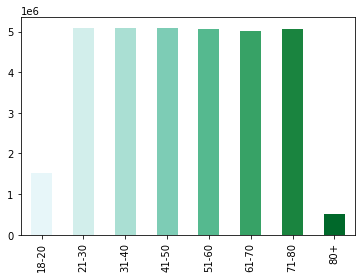

In [44]:
# Create a bar chart for age_bracket column

bar_age_bracket = df['age_bracket'].value_counts().sort_index().plot.bar(color = sns.color_palette('BuGn', 8))

In [45]:
# Export chart

bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_brackets.png'))

#### INCOME

In [46]:
# Look at the Income column

df['Income']

0           40423
1           40423
2           40423
3           40423
4           40423
            ...  
32434207    53755
32434208    46151
32434209    46151
32434210    46151
32434211    46151
Name: Income, Length: 32434212, dtype: int64

In [47]:
df['Income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: Income, Length: 108012, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Income'>

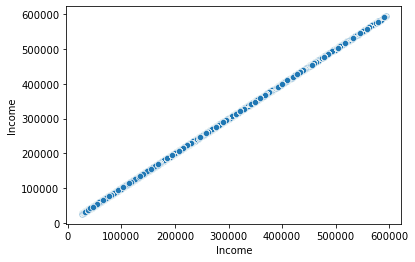

In [48]:
# Create scatterplot by plotting the 'Income' column against itself

sns.scatterplot(x = 'Income', y = 'Income', data = df)

Although there is positive correlation when the column is plotted against itself but I need to plot a histogram chart to look in to the Income column deeper.

<AxesSubplot:ylabel='Frequency'>

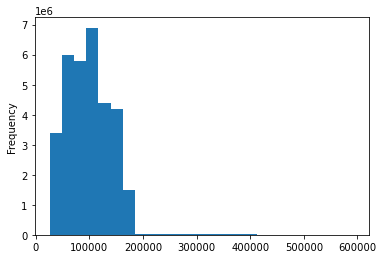

In [49]:
# Create a Histogram.

df['Income'].plot.hist(bins = 25)

In [50]:
# Income needs to be filtered in to brackets


df.loc[df['Income'] < 100000, 'Income_Range'] = '0 - 100k'
df.loc[(df['Income'] >= 100000) & (df['Income'] < 200000), 'Income_Range'] = '100-200k'
df.loc[(df['Income'] >= 200000) & (df['Income'] < 300000), 'Income_Range'] = '200-300k'
df.loc[(df['Income'] >= 300000) & (df['Income'] < 400000), 'Income_Range'] = '300-400k'
df.loc[(df['Income'] >= 400000) & (df['Income'] < 500000), 'Income_Range'] = '400-500k'
df.loc[df['Income'] >= 500000, 'Income_Range'] = 'Over 500k'

In [51]:
#Check the "Income_Range" column

df['Income_Range'].value_counts().sort_index()

0 - 100k     17606875
100-200k     14568745
200-300k       156927
300-400k        53971
400-500k        28339
Over 500k       19355
Name: Income_Range, dtype: int64

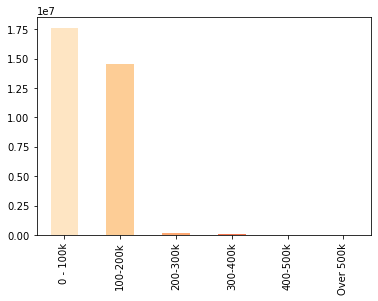

In [52]:
# Create bar chart for Income ranges

bar_income_range = df['Income_Range'].value_counts().sort_index().plot.bar(color = sns.color_palette('OrRd', 6))

In [53]:
# Export the bar chart

bar_income_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_range.png'))

In [54]:
# Age bracket and Income

crosstab_age_income = pd.crosstab(df['age_bracket'], df['Income_Range'], dropna = False)

In [55]:
crosstab_age_income

Income_Range,0 - 100k,100-200k,200-300k,300-400k,400-500k,Over 500k
age_bracket,,,,,,
18-20,1475394,44889,1832,2249,0,0
21-30,4925943,137895,6780,10518,0,0
31-40,4906036,148260,10474,10246,0,0
41-50,1533402,3499864,40740,6470,9702,6385
51-60,1564290,3454194,26758,11636,4541,3441
61-70,1515119,3442375,34278,7461,7480,2603
71-80,1524153,3499062,33401,5391,5501,5722
80+,162538,342206,2664,0,1115,1204


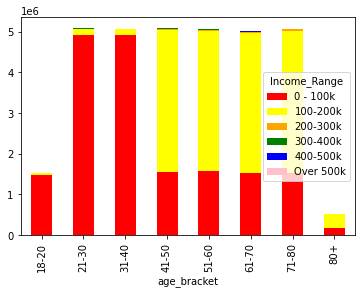

In [56]:
# Create Stacked bar for Income Range and Age Bracket

bar_age_income = crosstab_age_income.plot.bar(stacked = True, color = ['red', 'yellow', 'orange', 'green', 'blue', 'pink', 'purple', 'brown'])
plt.legend(title = 'Income_Range')

In [57]:
# Export stacked bar chart for Age bracket and Income range

bar_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_agebracket_incomerange.png'))

#### FAMILY STATUS

In [58]:
#Look at Family Status

df['Family_status'].value_counts()

married                             22776913
single                               5330769
divorced/widowed                     2774428
living with parents and siblings     1552102
Name: Family_status, dtype: int64

In [59]:
# Income Range and Family Status

crosstab_income_status = pd.crosstab(df['Income_Range'], df['Family_status'], dropna = False)

In [60]:
crosstab_income_status

Family_status,divorced/widowed,living with parents and siblings,married,single
Income_Range,,,,
0 - 100k,844737,1503078,11722077,3536983
100-200k,1904921,44849,10866000,1752975
200-300k,17188,2080,116747,20912
300-400k,2038,2095,36879,12959
400-500k,4229,0,20334,3776
Over 500k,1315,0,14876,3164


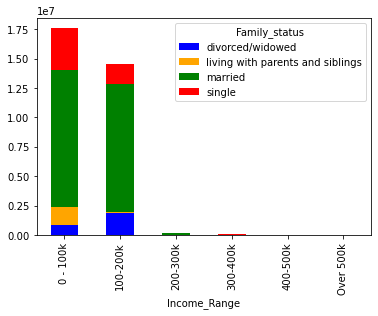

In [61]:
# Create stacked bar for income range and family status

bar_familystatus_income = crosstab_income_status.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red'])
plt.legend(title = 'Family_status')

In [62]:
# Export the stacked bar chart 

bar_familystatus_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_familystatus_income.png'))

In [63]:
# Look at which Family status has the highest and lowest spenders

crosstab_fam_status = pd.crosstab(df['Family_status'], df['spending_flag'], dropna = False)

In [64]:
crosstab_fam_status

spending_flag,High Spender,Low Spender
Family_status,,
divorced/widowed,52760,2721668
living with parents and siblings,29433,1522669
married,451924,22324989
single,101216,5229553


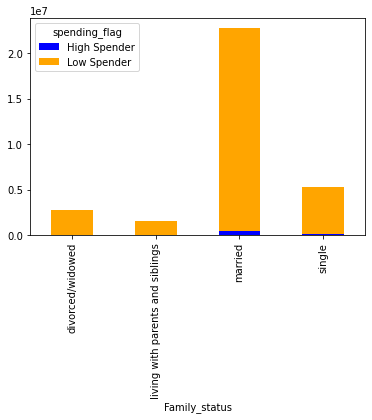

In [65]:
# Create stacked bar chart for family status and spending flag

bar_familystatus_spending = crosstab_fam_status.plot.bar(stacked = True, color = ['blue', 'orange'])
plt.legend(title = 'spending_flag')

In [66]:
# Export stacked bar for Family status and spending flag

bar_familystatus_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_familystatus_spending.png'))

In [67]:
# Age and spending flag

crosstab_age_spending = pd.crosstab(df['age_bracket'], df['spending_flag'], dropna = False)

In [68]:
crosstab_age_spending

spending_flag,High Spender,Low Spender
age_bracket,,
18-20,27386,1496978
21-30,94252,4986884
31-40,100273,4974743
41-50,110447,4986116
51-60,94219,4970641
61-70,103509,4905807
71-80,94314,4978916
80+,10933,498794


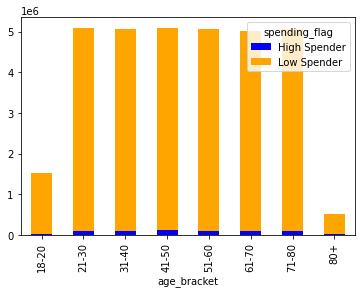

In [69]:
# Create stacked bar chart for age bracket and spending flag

bar_agebracket_spending = crosstab_age_spending.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'orange', 'brown', 'pink', 'purple'])
plt.legend(title = 'spending_flag')

In [70]:
# Export the stacked bar chart

bar_agebracket_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_agebracket_spending.png'))

In [72]:
# Age and family Status

crosstab_age_famstat = pd.crosstab(df['age_bracket'], df['Family_status'], dropna = False)

In [196]:
crosstab_age_famstat

Family_status,divorced/widowed,living with parents and siblings,married,single
age_bracket,,,,
18-20,0,1162216,0,362148
21-30,0,389886,3407473,1283777
31-40,0,0,3811752,1263264
41-50,0,0,3842274,1254289
51-60,117283,0,3780286,1167291
61-70,1269014,0,3740302,0
71-80,1243332,0,3829898,0
80+,144799,0,364928,0


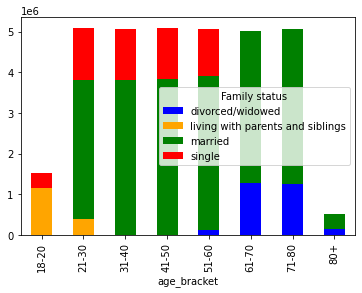

In [199]:
# Stacked bar for age and family status

bar_age_famstat = crosstab_age_famstat.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'orange', 'brown', 'pink', 'purple'])
plt.legend(title = 'Family status')

In [200]:
#  Export the stacked bar chart

bar_age_famstat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_famstat.png'))

In [204]:
# age and department

crosstab_age_dept = pd.crosstab(df['department'], df['age_bracket'], dropna = False)

In [205]:
crosstab_age_dept

age_bracket,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
department,,,,,,,,
alcohol,8852,23547,24851,24138,23789,22927,23458,2181
babies,20557,66414,65792,69771,64244,65326,64863,6835
bakery,54233,185082,183691,185608,184254,180793,184708,18418
beverages,122809,420077,414383,422968,424912,415269,425782,41959
breakfast,33887,111998,110662,112339,111203,107860,110935,11763
bulk,1648,5518,5342,5604,5170,5401,5365,525
canned goods,50237,169690,166296,166517,167489,165235,165958,16636
dairy eggs,254881,849619,853586,855715,835038,832303,848643,84231
deli,49052,164346,164900,164870,163690,163706,164478,16207


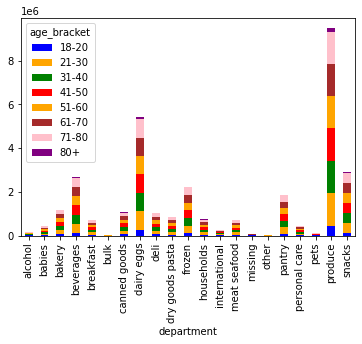

In [206]:
# Stacked bar for age and department

bar_age_dep = crosstab_age_dept.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'orange', 'brown', 'pink', 'purple'])
plt.legend(title = 'age_bracket')

In [208]:
# Export chart

bar_age_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_dept.png'))

#### NUMBER OF DEPENDANTS & PARENTAL STATUS

In [73]:
df['Number_of_Dependants'].value_counts().sort_index()

0    8105197
1    8088310
2    8098387
3    8142318
Name: Number_of_Dependants, dtype: int64

In [74]:
# Create conditions within the Number of Dependants column

df.loc[df['Number_of_Dependants'] == 0, 'parental_status'] = 'Not a Parent'

In [75]:
df.loc[df['Number_of_Dependants'] >= 1, 'parental_status'] = 'Parent'

In [76]:
# Check the column

df['parental_status'].value_counts(dropna = False)

Parent          24329015
Not a Parent     8105197
Name: parental_status, dtype: int64

In [77]:
# NUmber of Dependants and Parental Status

crosstab_deps_parents = pd.crosstab(df['Number_of_Dependants'], df['parental_status'], dropna = False)

In [78]:
crosstab_deps_parents

parental_status,Not a Parent,Parent
Number_of_Dependants,,
0,8105197,0
1,0,8088310
2,0,8098387
3,0,8142318


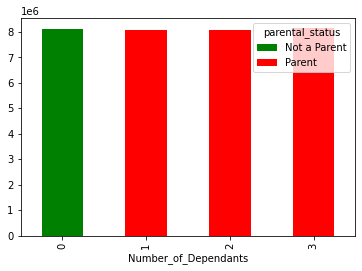

In [79]:
# Create stacked bar

bar_dependants_parentalstatus = crosstab_deps_parents.plot.bar(stacked = True, color = ['green', 'red'])
plt.legend(title = 'parental_status')

In [80]:
# Export the chart

bar_dependants_parentalstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_parentstatus.png'))

In [81]:
# Parental Status and Spending Flag

crosstab_par_stat_spending = pd.crosstab(df['parental_status'], df['spending_flag'], dropna = False)

In [82]:
crosstab_par_stat_spending

spending_flag,High Spender,Low Spender
parental_status,,
Not a Parent,153976,7951221
Parent,481357,23847658


In [83]:
# Age and Dependants

crosstab_age_depend = pd.crosstab(df['age_bracket'], df['Number_of_Dependants'], dropna = False)

In [84]:
crosstab_age_depend

Number_of_Dependants,0,1,2,3
age_bracket,,,,
18-20,362148,398343,374767,389106
21-30,1283777,1253387,1265976,1277996
31-40,1263264,1266744,1285915,1259093
41-50,1254289,1297340,1259922,1285012
51-60,1284574,1277146,1215194,1287946
61-70,1269014,1211162,1280320,1248820
71-80,1243332,1270306,1290113,1269479
80+,144799,113882,126180,124866


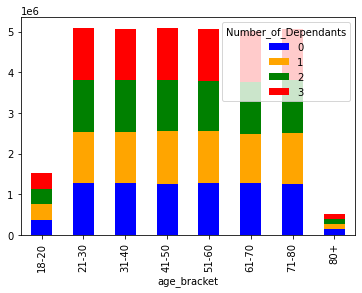

In [85]:
# Create Stacked bar chart for number of dependants and age bracket

bar_agebracket_dependants = crosstab_age_depend.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red'])
plt.legend(title = 'Number_of_Dependants')

In [86]:
# Export the stacked bar chart

bar_agebracket_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_agebracket_dependants.png'))

#### DEPARTMENTS

In [87]:
# Check the department_id column

df['department_id'].value_counts().sort_index()

1     2236432
2       36291
3     1176787
4     9479291
5      153743
6      269253
7     2688159
8       97724
9      866627
10      34573
11     447691
12     708931
13    1875577
14     710647
15    1068058
16    5414016
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: department_id, dtype: int64

In [88]:
# Import department data to look at which category each id number is associated with.

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '4.4_departments', 'departments.csv'))

In [89]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [90]:
# Create new department_id columns


df.loc[df['department_id'] == 1, 'department'] = 'frozen'
df.loc[df['department_id'] == 2, 'department'] = 'other'
df.loc[df['department_id'] == 3, 'department'] = 'bakery'
df.loc[df['department_id'] == 4, 'department'] = 'produce'
df.loc[df['department_id'] == 5, 'department'] = 'alcohol'
df.loc[df['department_id'] == 6, 'department'] = 'international'
df.loc[df['department_id'] == 7, 'department'] = 'beverages'
df.loc[df['department_id'] == 8, 'department'] = 'pets'
df.loc[df['department_id'] == 9, 'department'] = 'dry goods pasta'
df.loc[df['department_id'] == 10, 'department'] = 'bulk'
df.loc[df['department_id'] == 11, 'department'] = 'personal care'
df.loc[df['department_id'] == 12, 'department'] = 'meat seafood'
df.loc[df['department_id'] == 13, 'department'] = 'pantry'
df.loc[df['department_id'] == 14, 'department'] = 'breakfast'
df.loc[df['department_id'] == 15, 'department'] = 'canned goods'
df.loc[df['department_id'] == 16, 'department'] = 'dairy eggs'
df.loc[df['department_id'] == 17, 'department'] = 'households'
df.loc[df['department_id'] == 18, 'department'] = 'babies'
df.loc[df['department_id'] == 19, 'department'] = 'snacks'
df.loc[df['department_id'] == 20, 'department'] = 'deli'
df.loc[df['department_id'] == 21, 'department'] = 'missing'

In [91]:
# Check the new department_id columns

df['department'].value_counts().sort_index()

alcohol             153743
babies              423802
bakery             1176787
beverages          2688159
breakfast           710647
bulk                 34573
canned goods       1068058
dairy eggs         5414016
deli               1051249
dry goods pasta     866627
frozen             2236432
households          738666
international       269253
meat seafood        708931
missing              69145
other                36291
pantry             1875577
personal care       447691
pets                 97724
produce            9479291
snacks             2887550
Name: department, dtype: int64

In [92]:
# Spending flag and Parental Status

crosstab_depart_par_stat = pd.crosstab(df['department'], df['parental_status'], dropna = False)

In [93]:
crosstab_depart_par_stat

parental_status,Not a Parent,Parent
department,,
alcohol,39143,114600
babies,106494,317308
bakery,295538,881249
beverages,674450,2013709
breakfast,176557,534090
bulk,8278,26295
canned goods,264838,803220
dairy eggs,1353388,4060628
deli,265145,786104


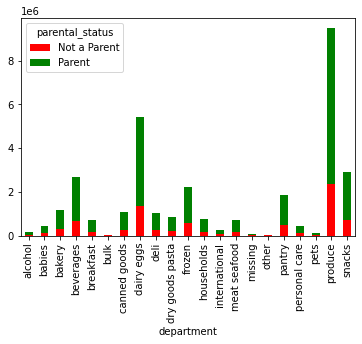

In [94]:
# Create stacked bar chart for department and parental status

bar_dept_parstatus = crosstab_depart_par_stat.plot.bar(stacked = True, color = ['red', 'green'])
plt.legend(title = 'parental_status')

In [95]:
# Export stacked bar chart

bar_dept_parstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_parstatus.png'))

#### ORDERS DAY OF THE WEEK

In [96]:
df['orders_day_of_the_week'].value_counts().sort_index()

0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: orders_day_of_the_week, dtype: int64

In [97]:
# Create new column for each day of the week

df.loc[df['orders_day_of_the_week'] == 0, 'weekday'] = 'Saturday'
df.loc[df['orders_day_of_the_week'] == 1, 'weekday'] = 'Sunday'
df.loc[df['orders_day_of_the_week'] == 2, 'weekday'] = 'Monday'
df.loc[df['orders_day_of_the_week'] == 3, 'weekday'] = 'Tuesday'
df.loc[df['orders_day_of_the_week'] == 4, 'weekday'] = 'Wednesday'
df.loc[df['orders_day_of_the_week'] == 5, 'weekday'] = 'Thursday'
df.loc[df['orders_day_of_the_week'] == 6, 'weekday'] = 'Friday'

In [98]:
# Check the weekday column

df['weekday'].value_counts()

Saturday     6209632
Sunday       5665830
Friday       4500246
Monday       4217766
Thursday     4209449
Tuesday      3844096
Wednesday    3787193
Name: weekday, dtype: int64

In [99]:
# Spenders and day of the week

crosstab_spender_day = pd.crosstab(df['weekday'], df['spending_flag'], dropna = False)

In [100]:
crosstab_spender_day

spending_flag,High Spender,Low Spender
weekday,,
Friday,81316,4418930
Monday,86833,4130933
Saturday,106886,6102746
Sunday,114401,5551429
Thursday,87415,4122034
Tuesday,79965,3764131
Wednesday,78517,3708676


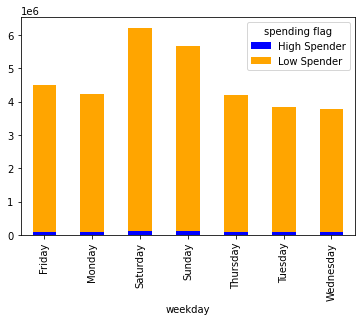

In [101]:
# Creat a stacked bar chart

bar_weekday_spending = crosstab_spender_day.plot.bar(stacked = True, color = ['blue', 'orange'])
plt.legend(title = 'spending flag')

In [102]:
# Export Chart

bar_weekday_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_weekday_spending.png'))

In [103]:
# Parental Status and Weekday

crosstab_stat_day = pd.crosstab(df['weekday'], df['parental_status'], dropna = False)

In [104]:
crosstab_stat_day

parental_status,Not a Parent,Parent
weekday,,
Friday,1112581,3387665
Monday,1050136,3167630
Saturday,1551751,4657881
Sunday,1426200,4239630
Thursday,1058149,3151300
Tuesday,960249,2883847
Wednesday,946131,2841062


In [105]:
# Weekday and Department

crosstab_day_depart = pd.crosstab(df['department'], df['weekday'], dropna = False)

In [106]:
crosstab_day_depart

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
department,,,,,,,
alcohol,19312,20329,17442,20606,27440,22463,26151
babies,56829,56698,81622,73057,51573,52455,51568
bakery,163327,152710,225382,204386,153850,139410,137722
beverages,341371,371282,432725,482355,375917,344579,339930
breakfast,90350,96000,127363,129622,94431,87299,85582
bulk,4723,4559,6137,6339,4580,4246,3989
canned goods,163607,132596,228161,179995,129185,119361,115153
dairy eggs,737729,708983,1020167,957422,712251,641481,635983
deli,145169,135582,209526,184736,134434,122133,119669


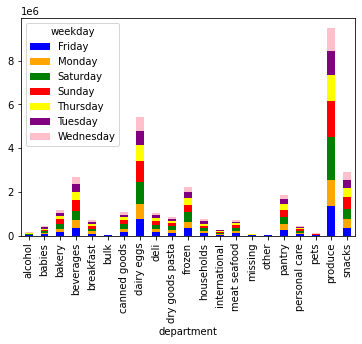

In [107]:
# Create stacked bar chart

bar_dept_weekday = crosstab_day_depart.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red', 'yellow', 'purple', 'pink'])
plt.legend(title = 'weekday')

In [108]:
# Export stacked bar chart

bar_dept_weekday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',' bar_dept_weekday.png'))

#### ORDERS HOUR OF DAY

In [109]:
df['order_hour_of_day'].value_counts().sort_index()

0      218942
1      115786
2       69431
3       51317
4       53283
5       88057
6      290770
7      891928
8     1719952
9     2456661
10    2764390
11    2738585
12    2620800
13    2663272
14    2691563
15    2664522
16    2537469
17    2089452
18    1637922
19    1259382
20     977017
21     796362
22     634737
23     402612
Name: order_hour_of_day, dtype: int64

In [110]:
# Family Status and Order Hour of Day

crosstab_famstat_hour = pd.crosstab(df['order_hour_of_day'], df['Family_status'], dropna = False)

In [111]:
crosstab_famstat_hour

Family_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,17142,11054,153668,37078
1,9050,5951,81472,19313
2,6498,3754,48092,11087
3,4651,2603,35689,8374
4,4186,2992,37545,8560
5,8067,4558,61418,14014
6,24450,15506,201707,49107
7,79691,43906,620792,147539
8,147884,79003,1208971,284094


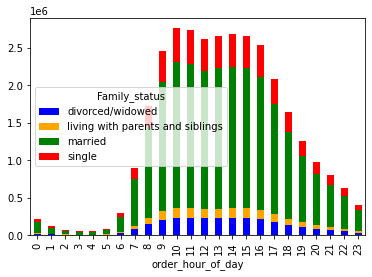

In [112]:
# Create stacked bar chart

bar_famstat_hour = crosstab_famstat_hour.plot.bar(stacked = True, color = ['blue', 'orange', 'green', 'red'])
plt.legend(title = 'Family_status')

In [113]:
# Export chart

bar_famstat_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_famstat_hour.png'))

In [114]:
# NUmber of Dependants and Order Hour of Day

crosstab_depend_hour = pd.crosstab(df['order_hour_of_day'], df['Number_of_Dependants'], dropna = False)

In [115]:
crosstab_depend_hour

Number_of_Dependants,0,1,2,3
order_hour_of_day,,,,
0,54220,54177,56002,54543
1,28363,29004,28919,29500
2,17585,18099,16837,16910
3,13025,12579,12542,13171
4,12746,14273,12806,13458
5,22081,23001,20540,22435
6,73557,72975,71532,72706
7,227230,219713,222624,222361
8,431978,428370,426002,433602


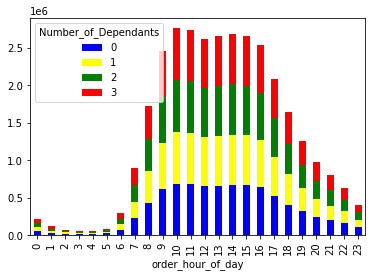

In [116]:
# Create stacked bar chart

bar_dependants_hour = crosstab_depend_hour.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Number_of_Dependants')

In [117]:
# Export chart

bar_dependants_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants_hour.png'))

Text(0.5, 0, 'Hours of the Day')

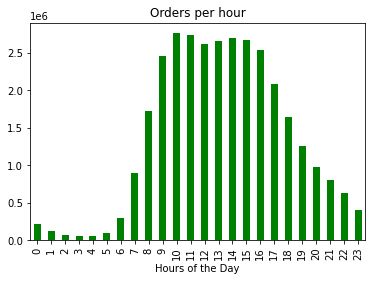

In [118]:
# Look at the busiest hours of the day

bar_busiest_hour = df['order_hour_of_day'].value_counts().sort_index().plot.bar(color = ['Green'])
plt.title('Orders per hour')
plt.xlabel('Hours of the Day')

In [119]:
# Export chart

bar_busiest_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busiest_hour.png'))

#### CUSTOMER LOYALTY

In [120]:
df['loyalty_flag'].value_counts()

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

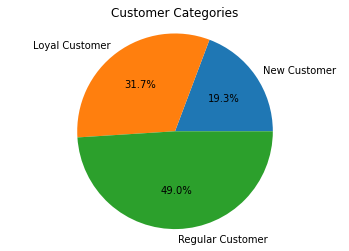

In [121]:
# Pie chart to show the percentages of the customer

labels = 'New Customer', 'Loyal Customer', 'Regular Customer'
sizes = [6249398, 10293737, 15891077]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Customer Categories')

plt.show()

In [122]:
#Export chart

ax1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

#### REGION

In [123]:
df['Region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: Region, dtype: int64

In [124]:
# Look at Region and Orders Hour of Day

crosstab_region_hours = pd.crosstab(df['order_hour_of_day'], df['Region'], dropna = False)

In [125]:
crosstab_region_hours

Region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,50785,38587,73351,56219
1,27378,21568,37926,28914
2,16997,12449,21994,17991
3,11917,9227,17446,12727
4,12697,9516,17981,13089
5,19872,15413,30881,21891
6,67368,50605,98769,74028
7,208452,159145,298007,226324
8,398566,305673,579649,436064


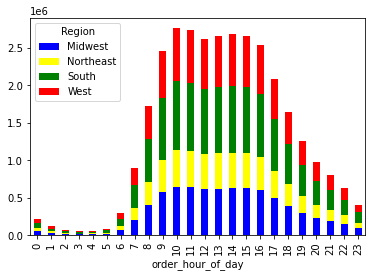

In [126]:
# Create Stacked Bar

bar_region_hour = crosstab_region_hours.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [127]:
# Export chart

bar_region_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_hour.png'))

In [128]:
# Region and weekday

crosstab_region_weekday = pd.crosstab(df['weekday'], df['Region'], dropna = False)

In [129]:
crosstab_region_weekday

Region,Midwest,Northeast,South,West
weekday,,,,
Friday,1058902,787995,1498091,1155258
Monday,992673,746892,1405940,1072261
Saturday,1461356,1098361,2054551,1595364
Sunday,1322079,1000935,1893905,1448911
Thursday,984001,747209,1401009,1077230
Tuesday,895896,679977,1288493,979730
Wednesday,888903,666978,1259621,971691


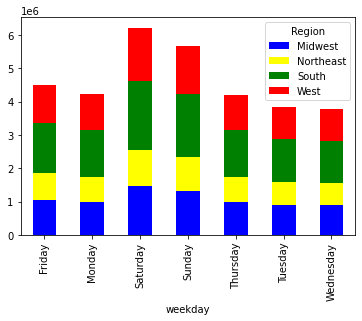

In [130]:
# Create Stacked bar chart

bar_region_weekday = crosstab_region_weekday.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [131]:
# Export the chart

bar_region_weekday.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_weekday.png'))

In [132]:
# Region and loyalty

crosstab_region_loyalty = pd.crosstab(df['Region'], df['loyalty_flag'], dropna = False)

In [133]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Midwest,2375969,1473837,3754004
Northeast,1843750,1101220,2783377
South,3408818,2076194,5316598
West,2665200,1598147,4037098


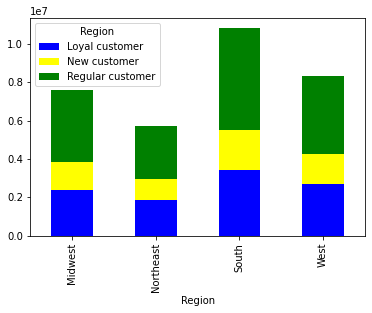

In [134]:
# Create stacked bar chart

bar_region_loyalty = crosstab_region_loyalty.plot.bar(stacked = True, color = ['blue', 'yellow', 'green'])
plt.legend(title = 'Region')

In [135]:
# Export the chart

bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_loyalty.png'))

In [136]:
# Region and Family Status

crosstab_region_Fam_status = pd.crosstab(df['Region'], df['Family_status'], dropna = False)

In [137]:
crosstab_region_Fam_status

Family_status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
Midwest,646939,366785,5330068,1260018
Northeast,501556,268480,4040166,918145
South,921608,530050,7567385,1782567
West,704325,386787,5839294,1370039


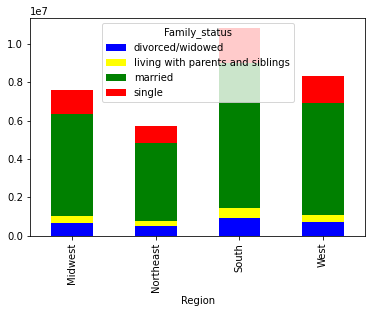

In [138]:
# Create Stacked Bar Chart

bar_region_famstatus = crosstab_region_Fam_status.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Family_status')

In [139]:
# Export chart

bar_region_famstatus.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_famstatus.png'))

### 7. Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure.

In [140]:
# Age and expenditure

df.groupby('age_bracket').agg({'prices': ['max', 'mean', 'min']})

prices               
               max       mean min
age_bracket                      
18-20        99999  10.131371   1
21-30        99999  12.064667   1
31-40        99999  11.676949   1
41-50        99999  11.615481   1
51-60        99999  11.501928   1
61-70        99999  11.494016   1
71-80        99999  11.489368   1
80+          99999   9.700134   1

In [141]:
df.groupby('age_bracket').agg({'frequency': ['max', 'mean', 'min']})

frequency               
                  max      mean  min
age_bracket                         
18-20            30.0  9.640035  0.0
21-30            30.0  9.638961  0.0
31-40            30.0  9.622607  0.0
41-50            30.0  9.615832  0.0
51-60            30.0  9.646486  0.0
61-70            30.0  9.585110  0.0
71-80            30.0  9.589852  0.0
80+              30.0  9.631227  1.0

In [142]:
df.groupby('age_bracket').agg({'days_since_prior_order': ['max', 'mean', 'min']})

days_since_prior_order                
                               max       mean  min
age_bracket                                       
18-20                         30.0  10.515923  0.0
21-30                         30.0  10.483410  0.0
31-40                         30.0  10.442939  0.0
41-50                         30.0  10.460215  0.0
51-60                         30.0  10.496769  0.0
61-70                         30.0  10.438521  0.0
71-80                         30.0  10.444821  0.0
80+                           30.0  10.473548  0.0

In [143]:
df.groupby('Income_Range').agg({'prices': ['max', 'mean', 'min']})

prices                
                max        mean min
Income_Range                       
0 - 100k      99999    7.669870   1
100-200k      99999   11.732582   1
200-300k      99999  260.014319   1
300-400k      99999  308.764466   1
400-500k      99999  261.952715   1
Over 500k     99999  176.118936   1

In [144]:
df.groupby('Income_Range').agg({'days_since_prior_order': ['max', 'mean', 'min']})

days_since_prior_order                
                                max       mean  min
Income_Range                                       
0 - 100k                       30.0  10.503894  0.0
100-200k                       30.0  10.427925  0.0
200-300k                       30.0   9.771923  0.0
300-400k                       30.0   9.605929  0.0
400-500k                       30.0   9.986281  0.0
Over 500k                      30.0   9.901256  0.0

In [145]:
df.groupby('Family_status').agg({'prices': ['max', 'mean', 'min']})

prices               
                                    max       mean min
Family_status                                         
divorced/widowed                  99999  11.013583   1
living with parents and siblings  99999  10.388785   1
married                           99999  11.564773   1
single                            99999  12.039654   1

In [146]:
df.groupby('Family_status').agg({'days_since_prior_order': ['max', 'mean', 'min']})

days_since_prior_order                
                                                    max       mean  min
Family_status                                                          
divorced/widowed                                   30.0  10.411665  0.0
living with parents and siblings                   30.0  10.416305  0.0
married                                            30.0  10.474735  0.0
single                                             30.0  10.458787  0.0

In [147]:
df.groupby('Region').agg({'prices': ['max', 'mean', 'min']})

prices               
             max       mean min
Region                         
Midwest    99999  12.273984   1
Northeast  99999  11.114829   1
South      99999  11.754529   1
West       99999  10.879513   1

In [148]:
df.groupby('Region').agg({'spending': ['max', 'mean', 'min']})

spending                
                    max       mean  min
Region                                 
Midwest    25005.425000  12.715745  1.0
Northeast   7414.485185  11.556398  1.1
South      15006.940000  12.196270  1.0
West       10209.987755  11.321374  1.0

### 8. Compare customer profiles with regions and departments. Identify a link between them?
### Customers may demonstrate different behaviours across regions.

### 9. Produce suitable charts to illustrate your results and export them in to the project folder.

In [149]:
# Look at number of customers in each region

crosstab_famstat_region = pd.crosstab(df['Family_status'], df['Region'], dropna = False)

In [150]:
crosstab_famstat_region

Region,Midwest,Northeast,South,West
Family_status,,,,
divorced/widowed,646939,501556,921608,704325
living with parents and siblings,366785,268480,530050,386787
married,5330068,4040166,7567385,5839294
single,1260018,918145,1782567,1370039


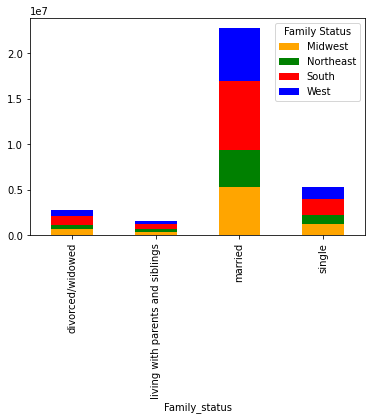

In [151]:
# Create stacked bar chart

bar_famstat_region = crosstab_famstat_region.plot.bar(stacked = True, color = ['orange', 'green', 'red', 'blue'])
plt.legend(title = 'Family Status')

In [152]:
# Export Chart

bar_famstat_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_famstat_region.png'))

In [153]:
# Department and Region

crosstab_dept_region = pd.crosstab(df['department'], df['Region'], dropna = False)

In [154]:
crosstab_dept_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,36195,26559,51633,39356
babies,98983,75139,143654,106026
bakery,274777,209468,390294,302248
beverages,625585,483422,898957,680195
breakfast,165269,125068,236753,183557
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1267696,956809,1801966,1387545
deli,245678,186817,349419,269335


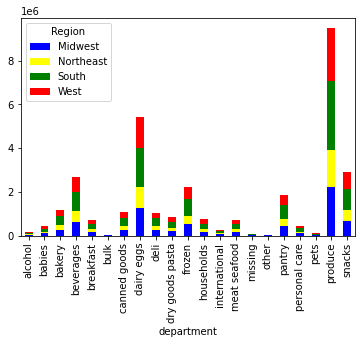

In [155]:
# Create stacked bar chart

bar_dept_region = crosstab_dept_region.plot.bar(stacked = True, color = ['blue', 'yellow', 'green', 'red'])
plt.legend(title = 'Region')

In [156]:
#Export the chart

bar_dept_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_region.png'))

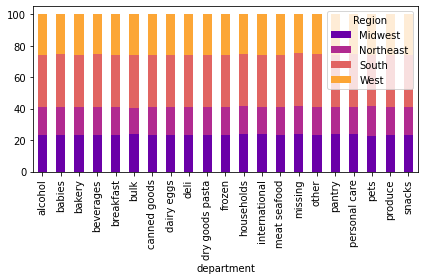

In [157]:
# 100% stacked bar chart

bar_dept_region_100 = crosstab_dept_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('plasma',4))
plt.tight_layout()

In [158]:
# Export Chart

bar_dept_region_100.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_region_100.png'))

In [159]:
# Look at Region and the Spending Flag

crosstab_region_spending = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [160]:
crosstab_region_spending

spending_flag,High Spender,Low Spender
Region,,
Midwest,156100,7447710
Northeast,108336,5620011
South,210128,10591482
West,160769,8139676


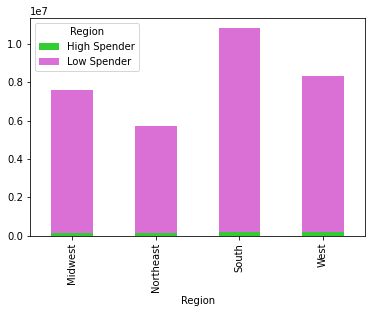

In [161]:
bar_region_spend = crosstab_region_spending.plot.bar(stacked = True, color = ['limegreen', 'orchid'])
plt.legend(title = 'Region')

In [162]:
# Export

bar_region_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spend.png'))

In [163]:
# Look at Frequency Flag and products

crosstab_freq_dept = pd.crosstab(df['department'], df['frequency_flag'], dropna = False)

In [164]:
crosstab_freq_dept

frequency_flag,Frequent Customer,Non-frequent customer,Regular customer
department,,,
alcohol,109946,12630,31167
babies,332714,22546,68542
bakery,831171,95408,250208
beverages,1884772,227508,575879
breakfast,494989,60725,154933
bulk,26300,2202,6071
canned goods,716976,102117,248965
dairy eggs,3885121,418663,1110232
deli,726875,90904,233470


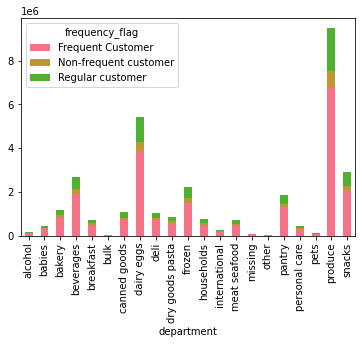

In [165]:
# Create stacked bar chart

bar_freq_dept = crosstab_freq_dept.plot.bar(stacked = True, color = sns.color_palette('husl'))
plt.legend(title = 'frequency_flag')

In [166]:
# Export

bar_freq_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_freq_dept.png'))

In [167]:
df['frequency_flag'].value_counts()

Frequent Customer        22813973
Regular customer          6930252
Non-frequent customer     2689987
Name: frequency_flag, dtype: int64

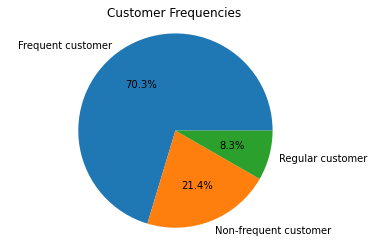

In [168]:
# Frequent Customers

labels = 'Frequent customer', 'Non-frequent customer', 'Regular customer'
sizes = [22813973, 6930252, 2689987]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title('Customer Frequencies')

plt.show()

In [169]:
# Export

ax2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_freq.png'))

In [170]:
# Parental status and region

crosstab_parstat_region = pd.crosstab(df['parental_status'], df['Region'], dropna = False)

In [171]:
crosstab_parstat_region

Region,Midwest,Northeast,South,West
parental_status,,,,
Not a Parent,1906957,1419701,2704175,2074364
Parent,5696853,4308646,8097435,6226081


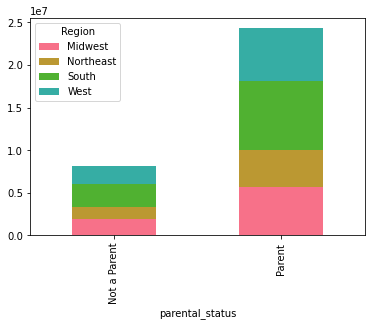

In [172]:
# Create stacked bar

bar_parstat_region = crosstab_parstat_region.plot.bar(stacked = True, color = sns.color_palette('husl'))
plt.legend(title = 'Region')

In [173]:
# Export

bar_parstat_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parstat_region.png'))

In [174]:
# Income and Region

crosstab_inc_reg = pd.crosstab(df['Income_Range'], df['Region'], dropna = False)

In [175]:
crosstab_inc_reg

Region,Midwest,Northeast,South,West
Income_Range,,,,
0 - 100k,4061049,3097363,5931734,4516729
100-200k,3477433,2589840,4784968,3716504
200-300k,34144,25412,52973,44398
300-400k,14577,8874,19541,10979
400-500k,8948,3374,7912,8105
Over 500k,7659,3484,4482,3730


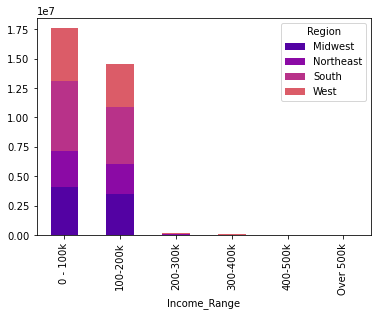

In [176]:
# Create Stacked bar Chart

bar_inc_reg = crosstab_inc_reg.plot.bar(stacked = True, color = sns.color_palette('plasma'))
plt.legend(title = 'Region')

In [177]:
# Export

bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_reg.png'))

In [178]:
# Age and Region

crosstab_age_reg = pd.crosstab(df['age_bracket'], df['Region'], dropna = False)

In [179]:
crosstab_age_reg

Region,Midwest,Northeast,South,West
age_bracket,,,,
18-20,355427,265863,517208,385866
21-30,1176146,897037,1711768,1296185
31-40,1185372,884978,1724535,1280131
41-50,1230165,894070,1667818,1304510
51-60,1189528,890386,1659038,1325908
61-70,1177967,901694,1659195,1270460
71-80,1158532,910267,1703285,1301146
80+,130673,84052,158763,136239


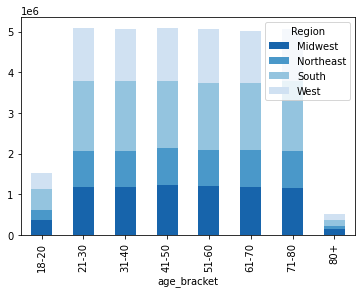

In [180]:
# Creat stacked Bar chart

bar_age_reg = crosstab_age_reg.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 4))
plt.legend(title = 'Region')

In [181]:
# Export

bar_age_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_reg.png'))

In [182]:
# Look at spending costs at the different times of the day

crosstab_prices_hour = pd.crosstab(df['order_hour_of_day'], df['prices'], dropna = False)

In [183]:
crosstab_prices_hour

prices,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,14900,99999
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,17494,14405,16520,18231,15626,18832,15952,16073,13320,13615,...,363,324,194,384,227,373,273,99,25,2
1,9223,7721,8613,9602,8401,9951,8413,8704,7052,6960,...,195,163,89,183,104,210,163,37,17,0
2,5517,4713,5283,5745,5090,5883,4984,5020,4245,4303,...,132,108,71,93,72,136,78,31,12,3
3,3917,3460,3767,4290,3726,4444,3745,3763,3173,3256,...,83,68,44,81,64,95,65,19,12,1
4,4233,3567,4057,4292,3836,4451,3879,3883,3223,3408,...,107,79,45,76,68,119,67,16,9,1
5,7080,5915,6420,7226,6329,7382,6431,6495,5273,5455,...,131,133,66,141,86,150,129,36,15,2
6,23366,19179,21318,24149,21110,24610,21646,21117,17673,17949,...,465,472,217,549,351,485,389,137,37,6
7,71921,58579,64852,74559,65178,74782,66465,64512,54113,55365,...,1463,1486,626,1664,1097,1582,1244,366,107,24
8,138535,114977,126800,144394,127041,145251,126914,122905,105047,105998,...,2666,2899,1305,3070,1962,3065,2308,691,205,50


In [184]:
# It would be more simpler if the mean of prices was found against order hour of day

df2 = df.groupby('order_hour_of_day').agg({'prices': ['mean']})

In [185]:
df2

,prices
,mean
order_hour_of_day,
0,9.986129
1,9.552528
2,14.253143
3,12.816455
4,11.792016
5,12.200563
6,11.340059
7,11.862051


Text(0, 0.5, 'price(mean)')

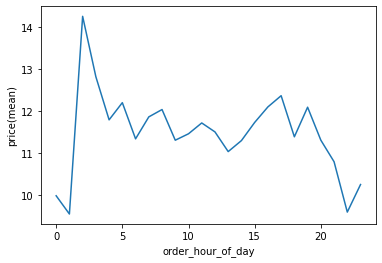

In [186]:
# LIne chart of mean prices and time of orders

line_meanprice_time = df2.plot.line(legend = False)
plt.ylabel('price(mean)')

In [187]:
# Export line chart

line_meanprice_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_meanprice_time.png'))

In [188]:
# Look at different price range products

df['price_range_loc'].value_counts()

Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: price_range_loc, dtype: int64

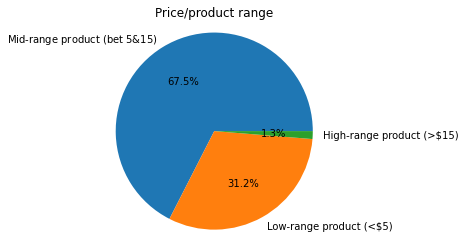

In [189]:
# Create pie chart

labels = 'Mid-range product (bet $5 & $15)', 'Low-range product (<$5)', 'High-range product (>$15)'
sizes = [21890146, 10126384, 417682]

fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%')
ax3.axis('equal')
ax3.set_title('Price/product range')

plt.show()

In [190]:
# Export Pie

ax3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_prodrange.png'))

In [191]:
# Look at different products in different price ranges

crosstab_pricerange_spend = pd.crosstab(df['price_range_loc'], df['spending_flag'], dropna = False)

In [192]:
crosstab_pricerange_spend

spending_flag,High Spender,Low Spender
price_range_loc,,
High-range product,20331,397351
Low-range product,176640,9949744
Mid-range product,438362,21451784


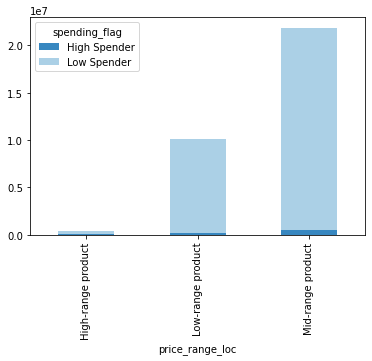

In [193]:
# Create stacked bar chart

bar_pricerange_spend = crosstab_pricerange_spend.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 2))
plt.legend(title = 'spending_flag')

In [194]:
# Export

bar_pricerange_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pricerange_spend.png'))

In [209]:
# EXPORT FINAL DATA SET

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_complete.pkl'))